![Python Logo](logo.png)
# Health Insurance Claims Analysis with Pandas
Author: **Amer Sanjak**<br>
email:sanjakam@gmail.com

In this tutorial, we will examine claims data set that was extracted from an Electronic Medical Records Billing System that I designed, developed and implemented in the United States.  

Medical billing is a payment practice within the United States health system. The process involves a healthcare provider submitting, and following up on, claims with health insurance companies in order to receive payment for services rendered; such as treatments and investigations.

The DataFrame we will be examining contains the following columns:

claimid
billedamount


status
dos
provider
insurance
patientid
dob
sex
city
state
zipcode


1. **claimid:** This is the primary key for the claims DataFrame
1. **billedamount:** The amount billed by the provider to the insurance company for provided  to patient
1. **paidamount:** The amount paid by insurance company to provider for the claim
1. **status:** Claim status category
1. **dos:** Date of service
1. **paiddate:** Paid date by insurance company
1. **provider:** Provider name -  real provider name has been removed
1. **insurance:** Insurance company name
1. **patientid:** Patient medical record number 
1. **dob:** Patient's date of birth
1. **sex:** Patient gender
1. **city:** Patient city
1. **state:** Patient State
1. **zipcode:** Patient zipcode


# Table of Content
### 1. Basic Setup

<ul>
   <li><a href="#A1">1.1 Version Information</a></li>
   <li><a href="#A2">1.2 Import all Packages</a></li>
   <li><a href="#A3">1.3 Style Function</a></li>
   <li><a href="#A4">1.4 Import CSVs files</a></li>
   <li><a href="#A5">1.5 Print First Five Records</a></li>
</ul>

### 2. Data Cleaning
<ul>
  <li><a href="#B1">2.1 Missing Values</a></li>
  <li><a href="#B2">2.2 Examin Missing Values</a></li>
  <li><a href="#B3">2.3 Drop Empty Rows</a></li>
  <li><a href="#B4">2.4 Convert date string columns with the .to_datetime() method</a></li>
  <li><a href="#B5">2.5 Create New Fields</a></li>  
</ul>

### 3. Data Analysis
<ul>
  <li><a href="#C1">3.1 Visit Statistics</a></li>
    <ul>
        <li><a href="#C311">3.1.1 Visits count Using unstack() method</a></li>
        <li><a href="#C312">3.1.2 Visits count Using crosstab() method</a></li>
        <li><a href="#C313">3.1.3 Visits count Using Group method</a></li>
        <li><a href="#C314">3.1.4 Plot Visit Count by Month</a></li>
        <li><a href="#C315">3.1.5 Age Group</a></li>
        <li><a href="#C316">3.1.6 Patient Visits by Gender</a></li>
        <li><a href="#C317">3.1.7 Patients by City</a></li>
        <li><a href="#C318">3.1.8 Patients by Zipcode</a></li>
        
        
    </ul>
</ul>

<ul>
  <li><a href="#D1">4.1 Revenues and Insurance  Statistics</a></li>
    <ul>
        <li><a href="#D411">4.1.1 Revenues by Month </a></li>
        <li><a href="#D411">4.1.2 Descriptive Statistics</a></li>
        <li><a href="#D412">4.1.3 Claims by Status Category </a></li>
        <li><a href="#D413">4.1.4 Patient Assignments by Insurance</a></li>
       
        
    </ul>
</ul>
***

## 1. Basic Setup

<h3 id="A1">1.1 Version Information</h3>

In [385]:
import sys
print(sys.version)

3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


<h3 id="A2">1.2 Import Packages</h3>

In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

from datetime import datetime
%matplotlib inline

<h3 id="A3">1.3 Style Function</h3>

**Style function**
You can apply conditional formatting, the visual styling of a DataFrame depending on the data within, by using the DataFrame.style property. This is a property that returns a pandas.Styler object, which has useful methods for formatting and displaying DataFrames. The styling is accomplished using CSS.

In [387]:
def color_negative(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: darkorange'` for negative
    strings, black otherwise.
    """
    color = 'darkorange' if val > 0 else 'black'
    return 'color: %s' % color
# s = df.style.applymap(color_negative_red)
# s

<h3 id="A4">1.4 Load and examine the DataSet</h3>
Let's get started. The code shown in the cell below loads the data from the claims_2008.csv file. Some minimal clean up is performed on the data. 

Execute the code in this cell to load the data into your notebook. **Make sure you have the claims_2008.csv file in your working directory!**

In [388]:
%%time
# Read data
url = 'claims_2008.csv'
claims = pd.read_csv(url, low_memory=False)

CPU times: user 29 ms, sys: 4.1 ms, total: 33.1 ms
Wall time: 31.1 ms


In [390]:
# set seed for reproducibility
np.random.seed(0) 

In [391]:
claims.shape

(9733, 14)

In [392]:
# Return the memory usage of each column in bytes
claims.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9733 entries, 0 to 9732
Data columns (total 14 columns):
patientid       9733 non-null int64
claimid         9733 non-null object
billedamount    9733 non-null int64
paidamount      9733 non-null float64
status          9733 non-null object
dos             9733 non-null object
provider        9733 non-null object
insurance       9732 non-null object
fileno          9733 non-null object
dob             9733 non-null object
sex             9733 non-null object
city            9733 non-null object
state           9733 non-null object
zipcode         9733 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 6.3 MB


***
Here are the first few rows of your dataset. 

In [429]:
# look at a few rows of the claims file. 
claims.head()

,patientid,claimid,billedamount,paidamount,status,dos,provider,insurance,fileno,dob,...,city,state,zipcode,year,month,day_of_week,balance,age_month,age_year,agegroup
0,204,CL10214,75,53.26,PAID,2008-01-23,Dr. A,BCBSM,PAT204,1999-03-24,...,Sterling Heights,MI,48310,2008,1,Wednesday,21.74,106,8.833333,5-10
1,204,CL16734,75,54.95,PAID,2008-09-05,Dr. A,BCBSM,PAT204,1999-03-24,...,Sterling Heights,MI,48310,2008,9,Friday,20.05,114,9.500000,5-10
2,205,CL11063,745,97.65,PAID,2008-02-20,Dr. A,MIDWEST HEALTH PLAN,PAT205,2007-02-15,...,Sterling Heights,MI,48310,2008,2,Wednesday,647.35,12,1.000000,0-1
3,205,CL12099,370,21.00,PAID,2008-03-25,Dr. A,MIDWEST HEALTH PLAN,PAT205,2007-02-15,...,Sterling Heights,MI,48310,2008,3,Tuesday,349.00,13,1.083333,1-2
4,205,CL14983,425,46.50,PAID,2008-07-02,Dr. A,MIDWEST HEALTH PLAN,PAT205,2007-02-15,...,Sterling Heights,MI,48310,2008,7,Wednesday,378.50,17,1.416667,1-2


## 2. Data cleansing

<h4 id="B">2.1 Missing Values</h4>
Get the number of missing data points and percentage per column

In [394]:
missing_values_count = claims.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(claims.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0007338803187976105

In [395]:
# Missing Values
pd.concat([claims.isnull().sum(), claims.isnull().sum()/len(claims) * 100], axis=1)\
.rename(columns={0:'Missing Records', 1:'Percentage (%)'})\
.sort_values(by='Percentage (%)',ascending=False)

# claims.isnull().sum()/len(claims)*100
# missing_values_count = claims.isnull().sum()

,Missing Records,Percentage (%)
insurance,1,0.010274
patientid,0,0.000000
claimid,0,0.000000
billedamount,0,0.000000
paidamount,0,0.000000
status,0,0.000000
dos,0,0.000000
provider,0,0.000000
fileno,0,0.000000
dob,0,0.000000


<h4 id="B2">2.2 Examin Missing Values</h4>
Examin if any value is NaN in a Pandas DataFrame

In [396]:
# examin the empty rows
empty_rows = claims[claims.isnull().T.any().T]
empty_rows.head()

,patientid,claimid,billedamount,paidamount,status,dos,provider,insurance,fileno,dob,sex,city,state,zipcode
8283,48199,CL13205,75,0.0,DENIED,4/29/08,Dr. A,NaN,PAT48199,9/16/97,Female,Warren,MI,48091


<h4 id="B3">2.3 Drop Empty Rows</h4>
Drop empty rows based on conditions

In [397]:
empty_value = claims.isnull().values.any()
if empty_value == True: 
    claims.dropna(how='any', inplace=True) ## drop rows  
    
# Alternative methods: 
#     claims.isnull().values.any()  ## Return Boolean (True or False)
#     claims.isnull().any().any() ## Return Boolean (True or False)
#     claims.isnull().values.sum() ## retrun NaN count
#     claims.isnull().sum().sum() ## retrun NaN count

<h4 id="B4">2.4 Convert date string columns with the .to_datetime() method</h4>
And let's confirm that the ***'dos  and dob'*** columns needs to be converted

In [398]:
claims.dtypes

patientid         int64
claimid          object
billedamount      int64
paidamount      float64
status           object
dos              object
provider         object
insurance        object
fileno           object
dob              object
sex              object
city             object
state            object
zipcode           int64
dtype: object

The date columns are string type. We can convert it to the datetime type with the .to_datetime() method.

In [399]:
# Convert date string columns in claims DataFrame with the .to_datetime() method 
claims["dos"] = pd.to_datetime(claims["dos"]) ## convert dos column
claims["dob"] = pd.to_datetime(claims["dob"])  ## convert dob column

<h4 id="B6">2.6 Convert column from float to int</h4>

In [400]:
# Convert zipcode column from float to int
cols = ['zipcode']
claims[cols] = claims[cols].applymap(np.int64)

<h4 id="B6">2.6 Create New Fields</h4>

In [401]:
# Creat new columns in a dataframe [year, month and balance]   
claims['year'] = pd.DatetimeIndex(claims['dos']).year  ## year of service
claims['month'] = pd.DatetimeIndex(claims['dos']).month  ## month of service
claims['day_of_week'] = claims['dos'].dt.weekday_name ## day of service
claims['balance'] = claims['billedamount'] - claims['paidamount']  ## claim balance
claims['age_month'] = claims.dos.dt.year*12 + claims.dos.dt.month - \
                      (claims.dob.dt.year*12 + claims.dob.dt.month)
claims['age_year'] = claims['age_month'] / 12

In [402]:
claims.sample(5)

,patientid,claimid,billedamount,paidamount,status,dos,provider,insurance,fileno,dob,sex,city,state,zipcode,year,month,day_of_week,balance,age_month,age_year
8104,48147,CL14058,75,0.00,CAP,2008-05-29,Dr. A,GREAT LAKES HEALTH PLAN,PAT48147,2008-03-28,Female,Sterling Heights,MI,48310,2008,5,Thursday,75.00,2,0.166667
2375,1512,CL13440,75,0.00,CAP,2008-05-05,Dr. A,GREAT LAKES HEALTH PLAN,PAT1512,2006-02-27,Male,Sterling Heights,MI,48313,2008,5,Monday,75.00,27,2.250000
9024,48617,CL17513,715,133.34,PAID,2008-09-29,Dr. A,GREAT LAKES HEALTH PLAN,PAT48617,2008-07-29,Male,Warren,MI,48093,2008,9,Monday,581.66,2,0.166667
8573,48347,CL19638,75,0.00,CAP,2008-12-05,Dr. A,GREAT LAKES HEALTH PLAN,PAT48347,2008-04-23,Female,Sterling Heights,MI,48310,2008,12,Friday,75.00,8,0.666667
8803,48468,CL19059,75,0.00,CAP,2008-11-14,Dr. A,MOLINA HEALTHCARE OF MICHIGAN,PAT48468,2008-07-02,Female,Sterling Heights,MI,48312,2008,11,Friday,75.00,4,0.333333


## Data Analysis

<h3 id="C1">3.1 Visit statistics by month</h3>

In [403]:
# Set index
# claims.set_index('dos', inplace=True)

<h4 id="C111">3.1.1 Visits count Using unstack() method</h4>

In [404]:
# Visits count Using unstack() method
df_unstack = claims.groupby('month')['sex'].value_counts().unstack().fillna(0)
df_unstack.style.applymap(color_negative)

sex,Female,Male
month,,
1,457,471
2,423,389
3,381,374
4,369,404
5,366,370
6,358,397
7,386,365
8,373,354
9,491,501


<h4 id="C112">3.1.2 Visits count Using crosstab() method</h4>

In [405]:
df_crosstab = pd.crosstab([claims["sex"]],claims["month"],margins=True, margins_name="Total")
# call style function
df_crosstab.style.applymap(color_negative)

month,1,2,3,4,5,6,7,8,9,10,11,12,Total
sex,,,,,,,,,,,,,
Female,457,423,381,369,366,358,386,373,491,436,383,407,4830
Male,471,389,374,404,370,397,365,354,501,490,394,393,4902
Total,928,812,755,773,736,755,751,727,992,926,777,800,9732


<h4 id="C114">3.1.4 Visits count Using Group method</h4>

In [406]:
# df_count = claims.groupby('month')['year'].value_counts().unstack()
df_count = claims.groupby(['month'])['claimid'].count()
df_count

month
1     928
2     812
3     755
4     773
5     736
6     755
7     751
8     727
9     992
10    926
11    777
12    800
Name: claimid, dtype: int64

<h4 id="C114">3.1.4 Plot Visits count by month</h4>

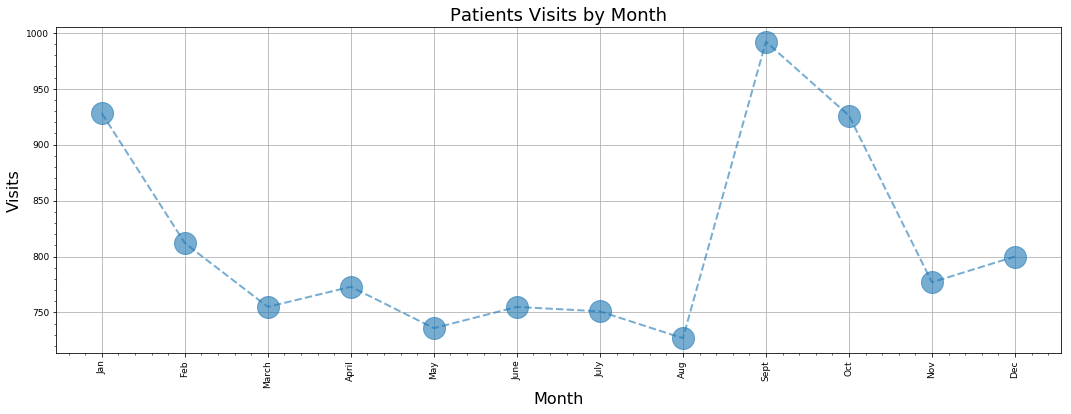

In [407]:
df_count.plot.line(
        grid=True, 
        figsize=(18,6),
        use_index =True,
        fontsize=9,
        sort_columns = True,
        rot=90, 
        marker='o', 
        linestyle='dashed',
        linewidth=2, 
        markersize=22,
        alpha=0.6)

#  Definition of tick_val and tick_lab
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12]
tick_lab = ['Jan','Feb','March','April','May','June','July','Aug','Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_val, tick_lab)

plt.xlabel('Month', fontsize=16) # Label x axis
plt.ylabel('Visits', fontsize=16) # Label y axis
plt.title('Patients Visits by Month', fontsize=18)
plt.minorticks_on()
plt.show()

**Partial string indexing and slicing**

In [408]:
# df = claims.groupby('dos')['status'].value_counts().unstack().fillna(0)
df = claims.groupby(['dos'])[["claimid"]].count()
# Subset data 
claim_sliced = df['2008-06-20': '2008-07-10']
claim_sliced.head()

,claimid
dos,
2008-06-20,36
2008-06-23,32
2008-06-24,37
2008-06-25,32
2008-06-26,30


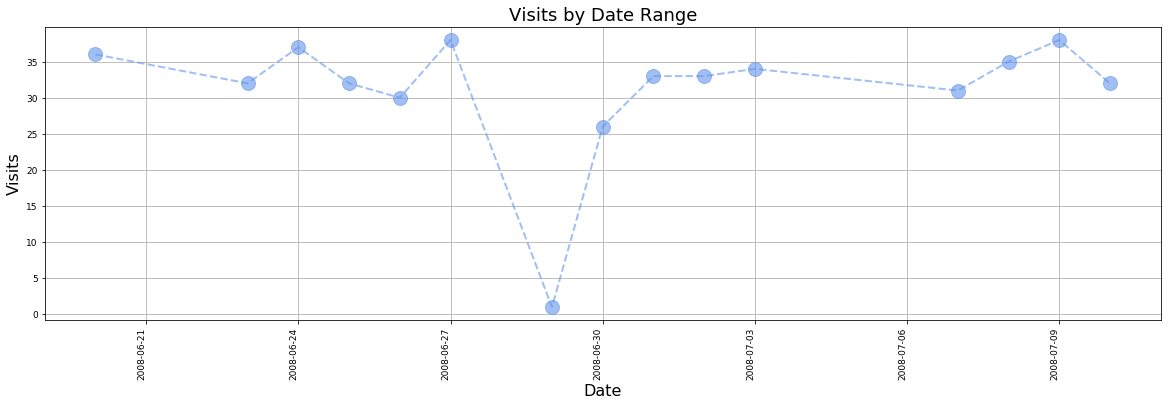

In [409]:
claim_sliced.plot.line(color=['#6495ED'],
                  grid=True, 
                  figsize=(20,6),
                  use_index =True,
                  fontsize=9,legend=False,
                  sort_columns = True,
                  rot=90, 
                  marker='o', 
                  linestyle='dashed',
                  linewidth=2, 
                  markersize=14,
                  alpha=0.6)


plt.xlabel('Date', fontsize='16') # Label x axis
plt.ylabel('Visits', fontsize='16') # Label y axis
plt.title('Visits by Date Range', fontsize='18')
plt.show()


<h4 id="C115">3.1.5 Age Group</h4>

In [410]:
claims['agegroup'] = pd.cut(claims.age_year,[0,1,2,3,4,5,10,20,30,100],\
                            labels=['0-1','1-2','2-3','3-4', '4-5','5-10','10-20','20-40','40-100', ])
byage = claims.groupby("agegroup").sex.value_counts().unstack()
byage

sex,Female,Male
agegroup,,
0-1,853,835
1-2,585,581
2-3,359,403
3-4,345,327
4-5,361,317
5-10,1053,1148
10-20,1097,1163
20-40,65,41
40-100,39,26


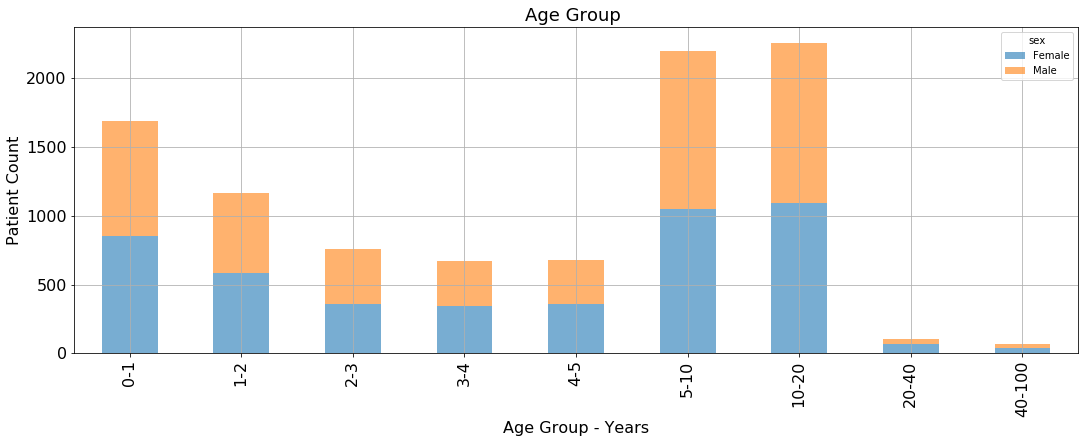

In [411]:
byage = claims.groupby(['agegroup']).sex.value_counts()
byage.unstack().plot.bar(figsize=(18,6), stacked=True, grid=True, legend=True,use_index =True,fontsize=16,sort_columns = True,rot=90, alpha=0.6)

plt.xlabel('Age Group - Years', fontsize=16) # Label x axis
plt.ylabel('Patient Count', fontsize=16) # Label y axis
plt.title('Age Group ', fontsize=18)
# plt.minorticks_on()
plt.show()


<h4 id="C116">3.1.6 Patient Visits by Gender</h4>

In [412]:
df_claims_sex = pd.crosstab([claims["month"]],claims["sex"])
# call style function
df_claims_sex.style.applymap(color_negative)

sex,Female,Male
month,,
1,457,471
2,423,389
3,381,374
4,369,404
5,366,370
6,358,397
7,386,365
8,373,354
9,491,501


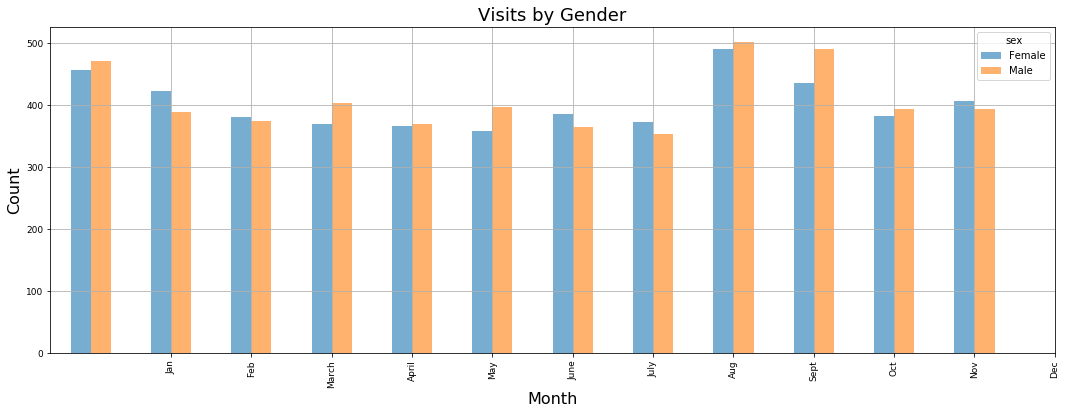

In [413]:
df_claims_sex.plot.bar(figsize=(18,6),grid=True, use_index =True,fontsize=9,sort_columns = True,rot=90,alpha=0.6)

#  Definition of tick_val and tick_lab
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12]
tick_lab = ['Jan','Feb','March','April','May','June','July','Aug','Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_val, tick_lab)

plt.xlabel('Month', fontsize=16) # Label x axis
plt.ylabel('Count', fontsize=16) # Label y axis
plt.title('Visits by Gender', fontsize=18)

plt.show()

In [414]:
TotalGender = claims["sex"].value_counts()
labels = (np.array(TotalGender.index))
sizes = (np.array((TotalGender / TotalGender.sum())*100))

sizes

array([ 50.36991369,  49.63008631])

<h4 id="C117">3.1.7 Patients by City</h4>

In [415]:
group_list = ['city']
df_city = claims.groupby(group_list).claimid.agg(['count']).reset_index()

df_city= df_city.sort_values(by='count', ascending=False) # sort dataframe
df_city['perc']= df_city['count']/df_city['count'].sum() ## calculate percent

df_city = df_city.head(15)
df_city

,city,count,perc
57,Sterling Heights,5310,0.545623
66,Warren,1457,0.149712
32,Madison Heights,552,0.056720
60,Troy,466,0.047883
31,Macomb,286,0.029388
40,Oak Park,213,0.021887
62,Utica,153,0.015721
17,Detroit,152,0.015619
53,Shelby Township,144,0.014797
47,Rochester,107,0.010995


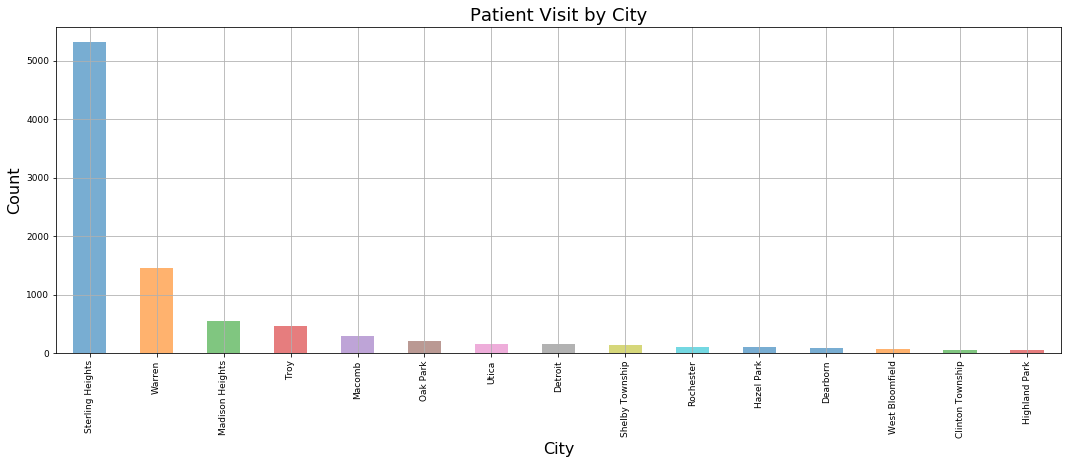

In [419]:
df_city.plot.bar(x='city', y='count', figsize=(18,6),grid=True, legend=False,use_index =True,fontsize=9,sort_columns = True,rot=90, alpha=0.6)

plt.xlabel('City', fontsize=16) # Label x axis
plt.ylabel('Count', fontsize=16) # Label y axis
plt.title('Patient Visit by City', fontsize=18)
# plt.minorticks_on()
plt.show()

<h4 id="C118">3.1.8 Patients by Zipcode</h4>

In [435]:
group_list = ['zipcode']
df_zipcode = claims.groupby(group_list).claimid.agg(['count']).reset_index()

df_zipcode= df_zipcode.sort_values(by='count', ascending=False) # sort dataframe
df_zipcode['perc']= df_zipcode['count']/df_zipcode['count'].sum() ## calculate percent

df_zipcode = df_zipcode.head(15)
df_zipcode

,zipcode,count,perc
96,48310,3856,0.396219
37,48092,667,0.068537
23,48071,544,0.055898
36,48091,526,0.054048
98,48312,526,0.054048
100,48314,474,0.048705
99,48313,456,0.046856
30,48083,279,0.028668
88,48237,213,0.021887
15,48044,206,0.021167


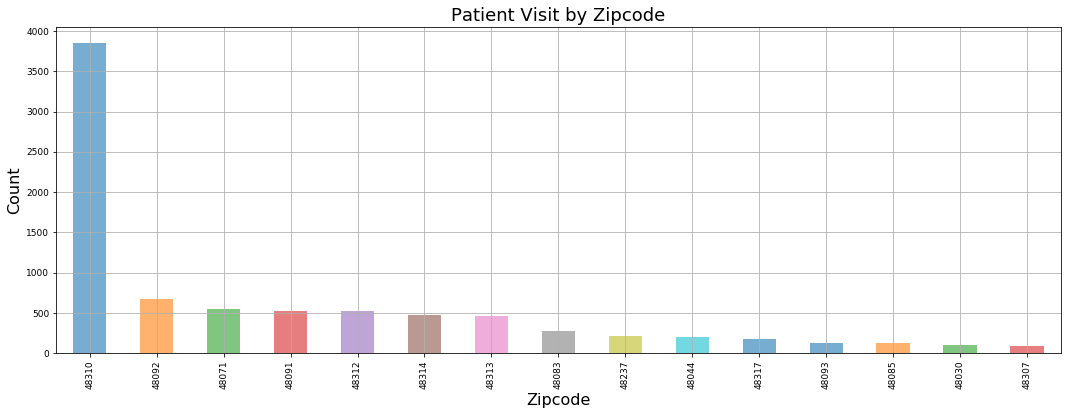

In [436]:
df_zipcode.plot.bar(x='zipcode', y='count', figsize=(18,6),grid=True, legend=False,use_index =True,fontsize=9,sort_columns = True,rot=90, alpha=0.6)

plt.xlabel('Zipcode', fontsize=16) # Label x axis
plt.ylabel('Count', fontsize=16) # Label y axis
plt.title('Patient Visit by Zipcode', fontsize=18)
# plt.minorticks_on()
plt.show()

<h3 id="D1">4.1 Revenues and Insurance Status Statistics</h3>

<h4 id="D411">4.1.1 Revenues by Month</h4>

In [282]:
df_revenues = pd.pivot_table(claims,index=["month"],values=["paidamount"],aggfunc=np.sum)
df_revenues

,paidamount
month,
1,38837.87
2,33345.69
3,31741.90
4,39927.90
5,27483.14
6,35857.31
7,39627.24
8,40948.31
9,49211.65


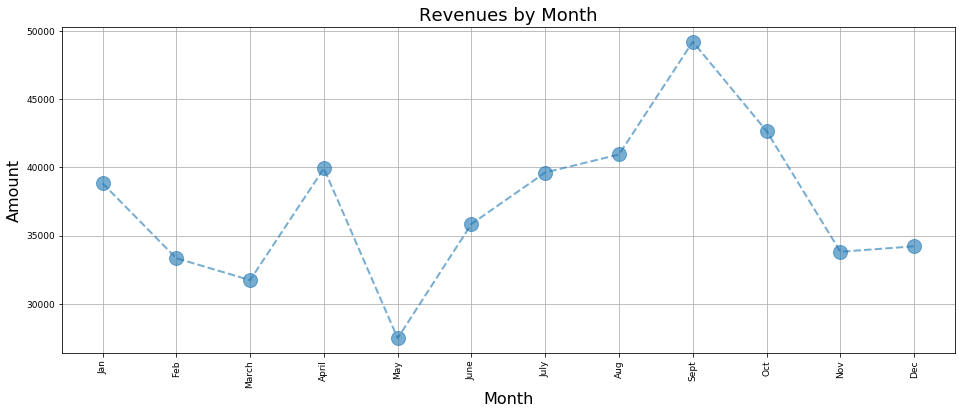

In [283]:
df_revenues = claims.groupby(['month'])[["paidamount"]].sum()
df_revenues.plot.line(grid=True, figsize=(16,6),use_index =True, legend=False,
                     fontsize=9,sort_columns = True,rot=90, marker='o', 
                     linestyle='dashed',linewidth=2, markersize=14,alpha=0.6)

#  Definition of tick_val and tick_lab
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12]
tick_lab = ['Jan','Feb','March','April','May','June','July','Aug','Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_val, tick_lab)

plt.xlabel('Month', fontsize=16) # Label x axis
plt.ylabel('Amount', fontsize=16) # Label y axis
plt.title('Revenues by Month', fontsize=18)

plt.show()

<h4 id="D412">4.2.1 Descriptive Statistics</h4>

In [290]:
group_list = ['insurance']
df_insum = claims.groupby(group_list).paidamount.agg(['sum', 'count', 'mean', 'median','std']).reset_index()

df_insum= df_insum.sort_values(by='sum', ascending=False) # sort dataframe
df_insum['perc']= df_insum['sum']/df_insum['sum'].sum() ## calculate percent

df_insum

,insurance,sum,count,mean,median,std,perc
9,GREAT LAKES HEALTH PLAN,126962.12,3754,33.820490,0.00,47.292366,0.283599
2,BCBSM,89329.63,1131,78.982874,59.94,69.566349,0.199538
14,MOLINA HEALTHCARE OF MICHIGAN,71195.56,1820,39.118440,0.00,56.186788,0.159032
12,MDCH,70297.47,980,71.732112,43.93,55.275752,0.157026
11,HEALTH PLAN OF MICH,48220.81,876,55.046587,29.57,35.216584,0.107712
13,MIDWEST HEALTH PLAN,15635.11,817,19.137222,0.00,32.447871,0.034925
0,AETNA,11746.76,145,81.012138,69.37,64.502393,0.026239
16,PPOM,7745.47,101,76.687822,64.37,55.757068,0.017301
7,CIGNA INTERNATIONAL,4144.00,33,125.575758,75.00,112.712863,0.009257
20,UNITED HEALTH CARE,789.02,14,56.358571,60.97,21.217154,0.001762


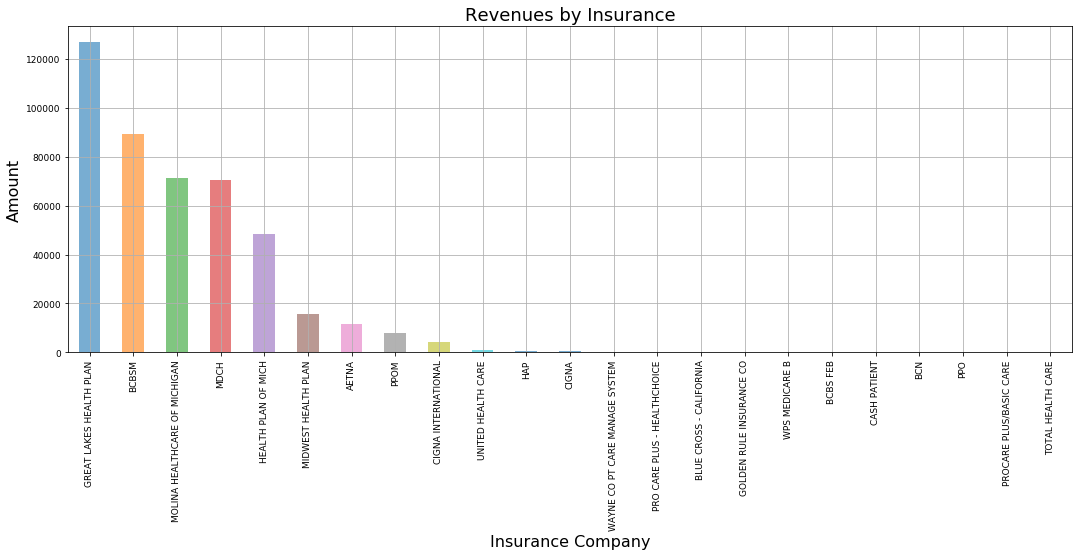

In [291]:
df_insum.plot.bar(x='insurance', y='sum', figsize=(18,6),grid=True, legend=False,use_index =True,fontsize=9,sort_columns = True,rot=90, alpha=0.6)

plt.xlabel('Insurance Company', fontsize=16) # Label x axis
plt.ylabel('Amount', fontsize=16) # Label y axis
plt.title('Revenues by Insurance', fontsize=18)
# plt.minorticks_on()
plt.show()

<h4 id="D413">4.1.3 Claims by Status Category</h4>

In [292]:
df_claims_status = pd.crosstab([claims["month"]],claims["status"])
# call style function
df_claims_status.style.applymap(color_negative)

status,CAP,DENIED,PAID,SUBMITTED
month,,,,
1,401,41,482,4
2,380,6,424,2
3,336,7,409,3
4,275,19,476,3
5,366,19,349,2
6,297,10,445,3
7,253,11,486,1
8,224,10,493,0
9,377,16,598,1


**Subplots**

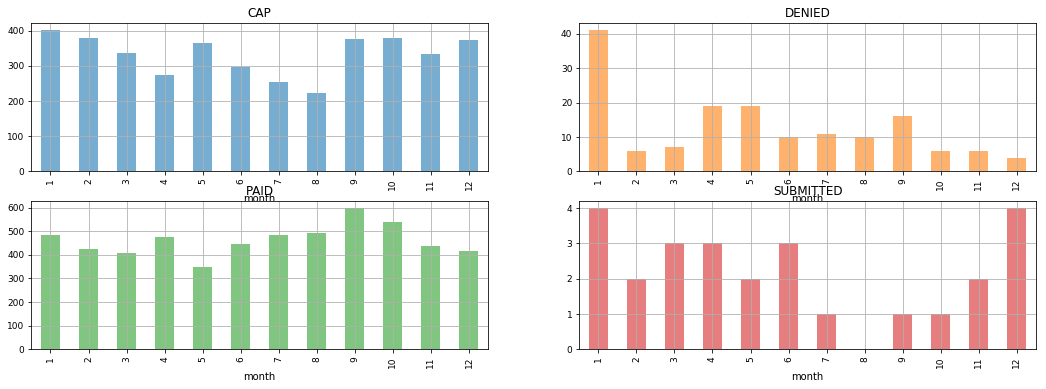

In [293]:
df_claims_status.plot.bar(subplots=True, layout=(2, -1), figsize=(18, 6), sharex=False, 
                         grid=True, use_index =True,fontsize=9,sort_columns = True,alpha=0.6, legend=False);

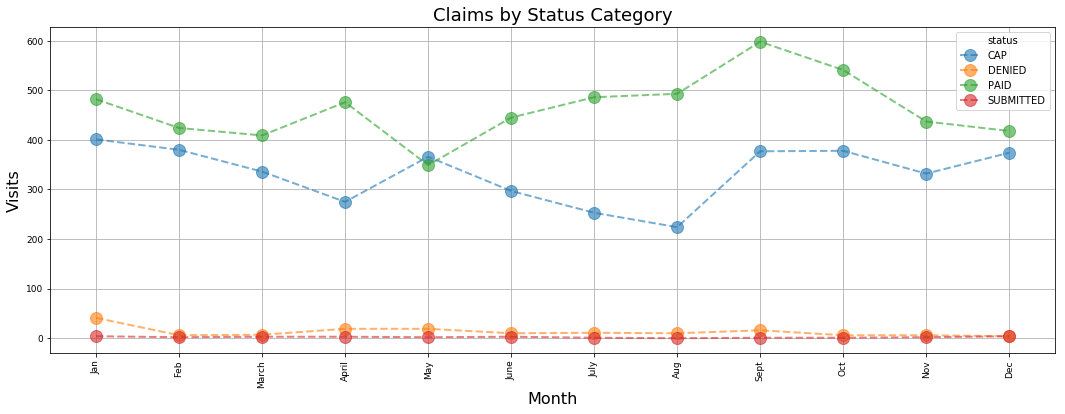

In [295]:
df_claims_status.plot.line(figsize=(18,6),grid=True, use_index =True,fontsize=9,sort_columns = True,
             rot=90, marker='o', linestyle='dashed',linewidth=2, markersize=12,alpha=0.6)

#  Definition of tick_val and tick_lab
tick_val = [1,2,3,4,5,6,7,8,9,10,11,12]
tick_lab = ['Jan','Feb','March','April','May','June','July','Aug','Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_val, tick_lab)

plt.xlabel('Month', fontsize=16) # Label x axis
plt.ylabel('Visits', fontsize=16) # Label y axis
plt.title('Claims by Status Category', fontsize=18)

plt.show()

<h4 id="D414">4.1.4 Patient Assignments by Insurance</h4>

In [296]:
group_list = ['insurance']
df_ins = claims.groupby(group_list).patientid.agg(['count']).reset_index()
df_ins= df_ins.sort_values(by='count', ascending=False)
df_ins['perc']= df_ins['count']/df_ins['count'].sum()
df_ins

,insurance,count,perc
9,GREAT LAKES HEALTH PLAN,3754,0.385738
14,MOLINA HEALTHCARE OF MICHIGAN,1820,0.187012
2,BCBSM,1131,0.116215
12,MDCH,980,0.100699
11,HEALTH PLAN OF MICH,876,0.090012
13,MIDWEST HEALTH PLAN,817,0.083950
0,AETNA,145,0.014899
16,PPOM,101,0.010378
7,CIGNA INTERNATIONAL,33,0.003391
10,HAP,16,0.001644


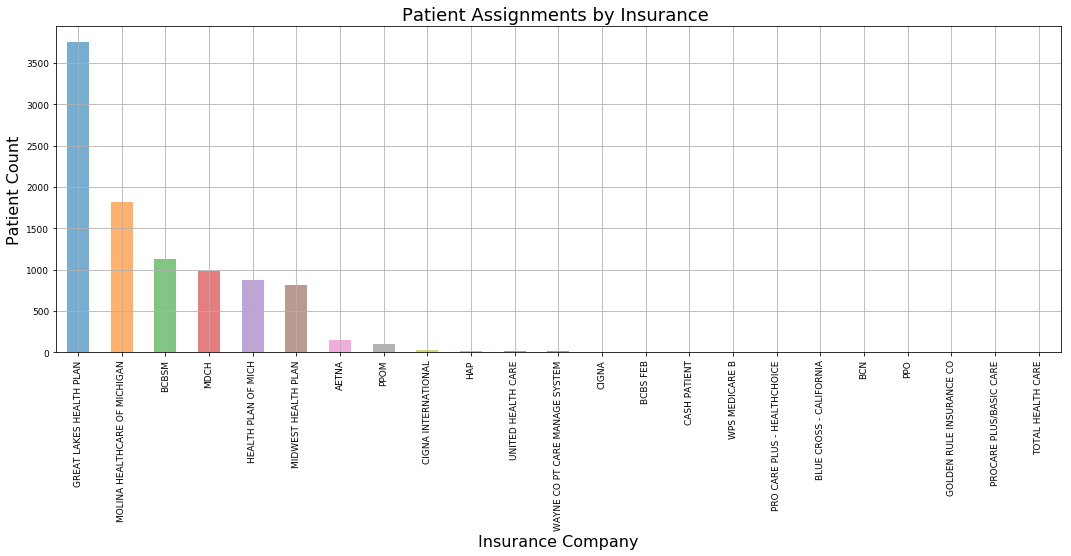

In [297]:
df_ins.plot.bar(x='insurance', y='count', figsize=(18,6),grid=True, legend=False,use_index =True,fontsize=9,sort_columns = True,rot=90, alpha=0.6)

plt.xlabel('Insurance Company', fontsize=16) # Label x axis
plt.ylabel('Patient Count', fontsize=16) # Label y axis
plt.title('Patient Assignments by Insurance ', fontsize=18)
# plt.minorticks_on()
plt.show()

**Descriptive Statistics**

In [298]:
# Descriptive or Summary Statistics in python pandas – describe()
list_include = [ 'float64']
claims.describe(include=list_include)

,paidamount,balance,age_year
count,9732.000000,9732.000000,9732.000000
mean,46.000953,147.735381,6.315257
std,55.201300,158.434821,5.929953
min,0.000000,-130.220000,0.000000
25%,0.000000,65.810000,1.500000
50%,29.570000,75.000000,4.666667
75%,83.610000,165.000000,10.000000
max,700.220000,1508.070000,39.916667


Descriptive Statistics by State

In [306]:
claims.groupby('state')['paidamount'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
CA,2.0,53.480000,75.632141,0.00,26.74,53.48,80.22,106.96
IL,1.0,75.000000,NaN,75.00,75.00,75.00,75.00,75.00
MI,9728.0,45.986933,55.198479,0.00,0.00,29.57,83.61,700.22
NV,1.0,138.430000,NaN,138.43,138.43,138.43,138.43,138.43


### end of report